In [3]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = defaultdict(list)
with open("wgs_individual_dnm_counts.txt", 'rt') as fh:
    for line in fh:
        cols = line.strip().split()
        if cols[1] == 'NA':
            continue
        df['sample_id'].append(cols[1])
        df['dnms'].append(int(cols[0]))
df = pd.DataFrame.from_dict(df)
df.head()

sample_id  dnms
0   00033-C     1
1   00119-C     1
2   00131-C     1
3   00135-C     1
4   00135-S     1

In [5]:
df.dnms.describe()

count    6824.000000
mean       81.543962
std        42.707436
min         1.000000
25%        53.000000
50%        78.000000
75%       113.000000
max       432.000000
Name: dnms, dtype: float64

In [6]:
df.dnms.quantile(0.95)

152.0

In [7]:
df.dnms.quantile(0.05)

1.0

In [9]:
df.dnms.quantile(0.1)

33.0

In [10]:
df.dnms.quantile(0.90)

140.0

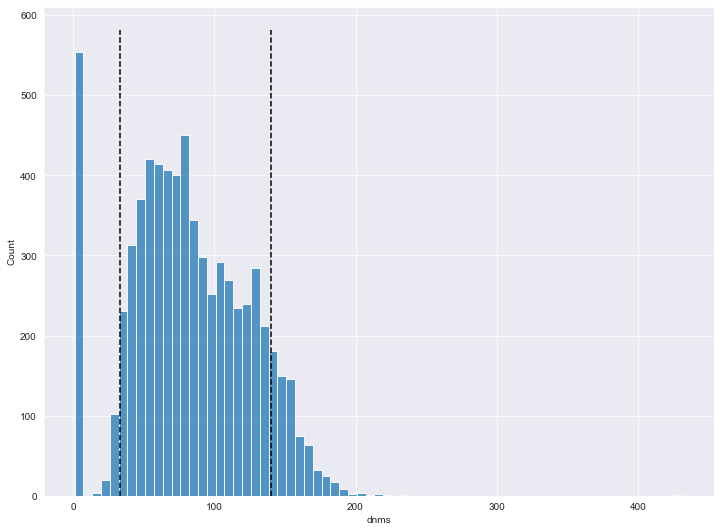

In [19]:
sns.set_style('darkgrid')
lower = df.dnms.quantile(0.1)
upper = df.dnms.quantile(0.9)
plt.figure(figsize=(12,9))
ax = sns.histplot(df.dnms, kde=False)
ylims = ax.get_ylim()
plt.plot((lower, lower), (0, ylims[1]), '--', c='k')
plt.plot((upper, upper), (0, ylims[1]), '--', c='k')